# Reading Data

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# chicking data informations

In [46]:
pd.DataFrame({"Data types":df.dtypes,
              "uniqe values":df.nunique(),
              "null values":df.isna().sum()}).T

,age,sex,bmi,children,smoker,region,charges
Data types,int64,object,float64,int64,object,object,float64
uniqe values,47,2,548,6,2,4,1337
null values,0,0,0,0,0,0,0


# converting object columns to category columns

In [47]:
cols_to_category = ["sex","children","smoker","region"]
df[cols_to_category] = df[cols_to_category].astype("category")

In [48]:
pd.DataFrame({"Data types":df.dtypes,
              "uniqe values":df.nunique(),
              "null values":df.isna().sum(),
             "duplicate data":df.duplicated().sum()}).T

,age,sex,bmi,children,smoker,region,charges
Data types,int64,category,float64,category,category,category,float64
uniqe values,47,2,548,6,2,4,1337
null values,0,0,0,0,0,0,0
duplicate data,1,1,1,1,1,1,1


# Chick for duplicate data

In [49]:
pd.DataFrame({"Data types":df.dtypes,
              "uniqe values":df.nunique(),
              "null values":df.isna().sum(),
             "duplicate data":df.duplicated().sum()}).T

,age,sex,bmi,children,smoker,region,charges
Data types,int64,category,float64,category,category,category,float64
uniqe values,47,2,548,6,2,4,1337
null values,0,0,0,0,0,0,0
duplicate data,1,1,1,1,1,1,1


# drop duplicate data

In [50]:
df.drop_duplicates(inplace=True,keep='last')

In [51]:
pd.DataFrame({"Data types":df.dtypes,
              "uniqe values":df.nunique(),
              "null values":df.isna().sum(),
             "duplicate data":df.duplicated().sum()}).T

,age,sex,bmi,children,smoker,region,charges
Data types,int64,category,float64,category,category,category,float64
uniqe values,47,2,548,6,2,4,1337
null values,0,0,0,0,0,0,0
duplicate data,0,0,0,0,0,0,0


# Some states and visulaizations

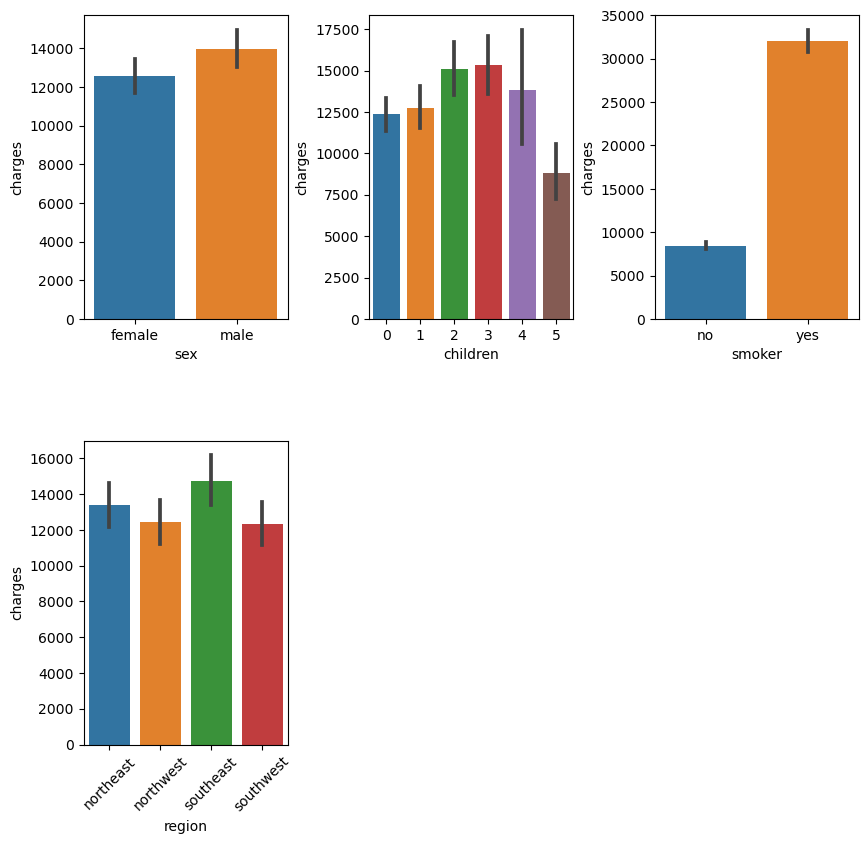

In [52]:
columns = "sex children smoker region".split()
plt.figure(figsize=(10,15))
for index,col in enumerate(df[columns]):
    plt.subplot(3,3,index+1)
    sns.barplot(x=df[col] , y=df["charges"])
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.4 , wspace=.4)
plt.show()

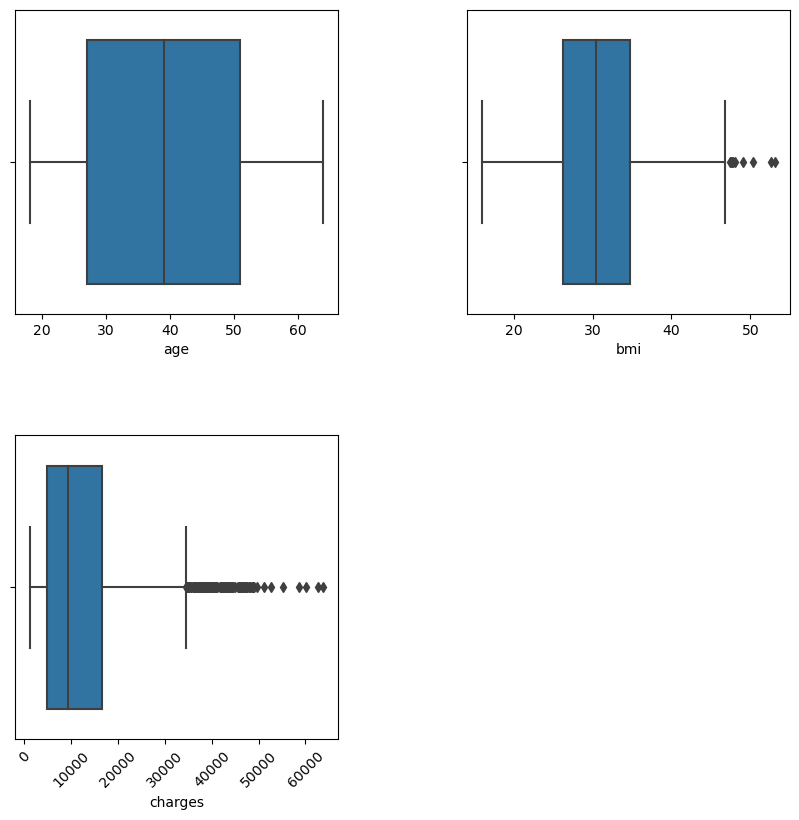

In [53]:
columns = "age bmi charges".split()
plt.figure(figsize=(10,15))
for index,col in enumerate(df[columns]):
    plt.subplot(3,2,index+1)
    sns.boxplot(x=df[col])
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.4 , wspace=.4)
plt.show()

In [54]:
df.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


# chick for outliers

In [55]:
q1 = df.bmi.quantile(.25)
q3 = df.bmi.quantile(.75)
IQR = q3 - q1

In [56]:
upper_pound = q3 + 1.5 * IQR

In [57]:
outliers = df[df["bmi"] > upper_pound]["bmi"].values

In [58]:
outliers

array([49.06, 48.07, 47.52, 47.41, 50.38, 47.6 , 52.58, 47.74, 53.13])

In [59]:
df["bmi"].replace(outliers , upper_pound , inplace=True)

In [60]:
df.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.650247,13279.121487
std,14.044333,6.059655,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,47.315000,63770.428010


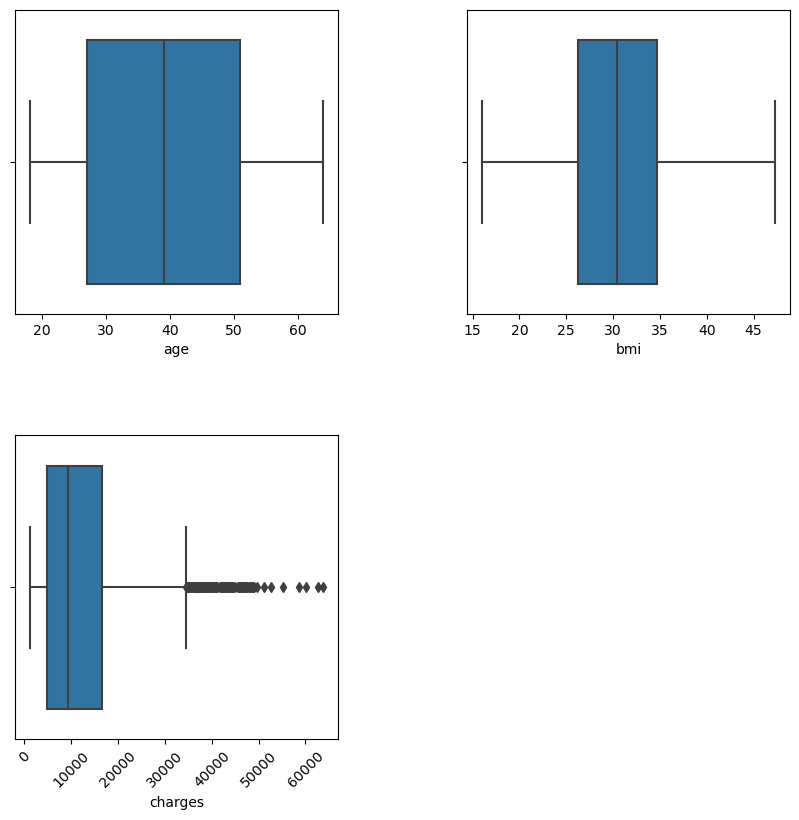

In [61]:
columns = "age bmi charges".split()
plt.figure(figsize=(10,15))
for index,col in enumerate(df[columns]):
    plt.subplot(3,2,index+1)
    sns.boxplot(x=df[col])
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.4 , wspace=.4)
plt.show()

# Spliting data befor scaling , encoding and training

In [62]:
X , y = df.iloc[:,:-1] , df.iloc[:,-1:]

In [63]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.2 , shuffle=True)
X_train , X_val , y_train , y_val = train_test_split(X_train,y_train , test_size=.2 , shuffle=True)

# scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [66]:
df["age"] = df["age"].astype("float")
colum_to_norm = ["age","bmi"]


X_train[colum_to_norm] = X_scaler.fit_transform(X_train[colum_to_norm])
X_test[colum_to_norm] = X_scaler.transform(X_test[colum_to_norm])
X_val[colum_to_norm] = X_scaler.transform(X_val[colum_to_norm])

y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)
y_val = y_scaler.transform(y_val)

# encoding

In [67]:
X_train = pd.get_dummies(X_train,columns=["sex","smoker","region"],drop_first=True)
X_test = pd.get_dummies(X_test,columns=["sex","smoker","region"],drop_first=True)
X_val = pd.get_dummies(X_val,columns=["sex","smoker","region"],drop_first=True)

# model

In [68]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)

In [69]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [70]:
from sklearn.metrics import mean_absolute_error
y_pred_train = model.predict(X_train)
y_pred_train_or = y_scaler.inverse_transform([y_pred_train])
y_train_or = y_scaler.inverse_transform(y_train.T)
mean_absolute_error(y_train_or, y_pred_train_or)

37.00887883040935

In [71]:
from sklearn.metrics import mean_absolute_error
y_pred_val = model.predict(X_val)
y_pred_val_or = y_scaler.inverse_transform([y_pred_val])
y_val_or = y_scaler.inverse_transform(y_val.T)
mean_absolute_error(y_val_or, y_pred_val_or)

2396.868921420561

In [72]:
from sklearn.metrics import mean_absolute_error
y_pred_test = model.predict(X_test)
y_pred_test_or = y_scaler.inverse_transform([y_pred_test])
y_test_or = y_scaler.inverse_transform(y_test.T)
mean_absolute_error(y_test_or, y_pred_test_or)

2961.514991380597

# handling data with polynomial rgerission

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)

In [74]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_val_poly = poly.fit_transform(X_val)

In [75]:
model1 = DecisionTreeRegressor(random_state=0)
model1.fit(X_train_poly , y_train)

DecisionTreeRegressor(random_state=0)

In [76]:
y_pred_train_poly = model1.predict(X_train_poly)
y_pred_train_p_or = y_scaler.inverse_transform([y_pred_train_poly])
y_train_or = y_scaler.inverse_transform(y_train.T)
mean_absolute_error(y_train_or, y_pred_train_p_or)

37.00887883040935

In [77]:
y_pred_val_p = model1.predict(X_val_poly)
y_pred_val_p_or = y_scaler.inverse_transform([y_pred_val_p])
y_val_p_or = y_scaler.inverse_transform(y_val.T)
mean_absolute_error(y_val_p_or, y_pred_val_p_or)

2378.6494730186914

In [78]:
y_pred_test_p = model1.predict(X_test_poly)
y_pred_test_p_or = y_scaler.inverse_transform([y_pred_test_p])
y_test_p_or = y_scaler.inverse_transform(y_test.T)
mean_absolute_error(y_test_p_or, y_pred_test_p_or)

3014.1958249253735

# after handeling over fitting

In [85]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=2)
clf.fit(X_train, y_train)

Ridge(alpha=2)

In [86]:
model2 = DecisionTreeRegressor(random_state=0)
model2.fit(X_train,y_train)
y_pred_trainR = model2.predict(X_train)
y_pred_trainR_or = y_scaler.inverse_transform([y_pred_trainR])
y_trainR_or = y_scaler.inverse_transform(y_train.T)
mean_absolute_error(y_trainR_or, y_pred_trainR_or)

37.00887883040935

In [87]:
y_pred_valR = model2.predict(X_val)
y_pred_valR_or = y_scaler.inverse_transform([y_pred_valR])
y_valR_or = y_scaler.inverse_transform(y_val.T)
mean_absolute_error(y_valR_or, y_pred_valR_or)

2396.868921420561

In [88]:
y_pred_testR = model2.predict(X_test)
y_pred_testR_or = y_scaler.inverse_transform([y_pred_testR])
y_testR_or = y_scaler.inverse_transform(y_test.T)
mean_absolute_error(y_testR_or, y_pred_testR_or)

2961.514991380597

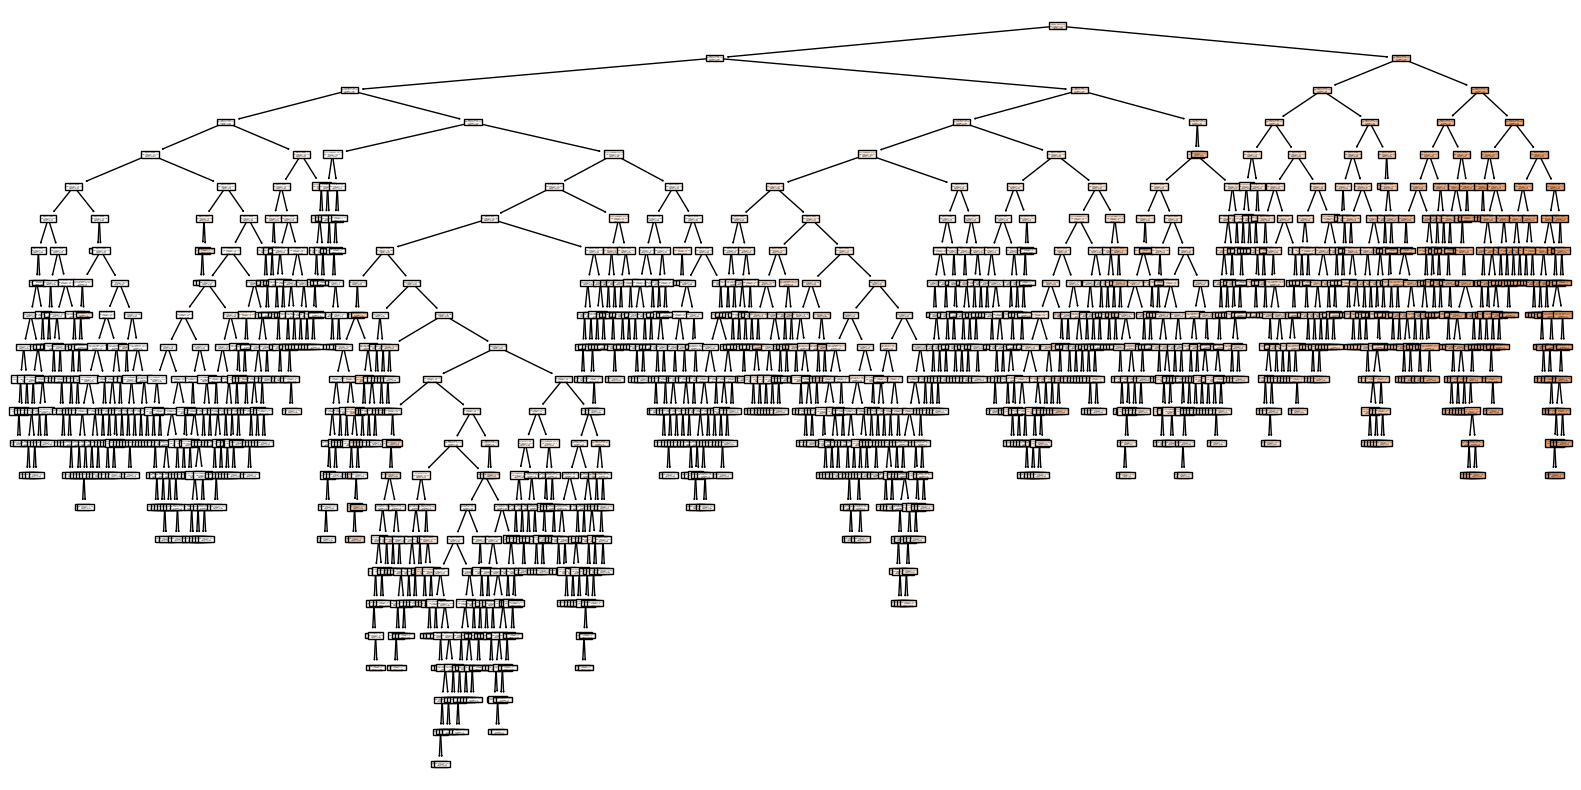

In [89]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()